<a href="https://colab.research.google.com/github/abdghazi/heart-disease-classification/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease Prediction
in this notebook we will try to predict if a person has a heart disease or not.

we will use python for this task along with some of the most known libraries for machine learning and data analysis (sklearn,
pandas, tensorflow, numpy)

one of my goals in this notebook is to test if feed foreword net or XGBOOST will perform better 

In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import keras 
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.unique()

array([1, 0])

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

in this experiment only 14 features are used 

In [5]:
print(f'data frame has {df.shape[1]} columns and {df.shape[0]} rows')

data frame has 14 columns and 303 rows


In [6]:
# removing messing data from the dataframe

for i in df.columns:
    print(i, df[i].isnull().sum())

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0


the dataframe is free of NAN values, we can proceed to the next step

In [7]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


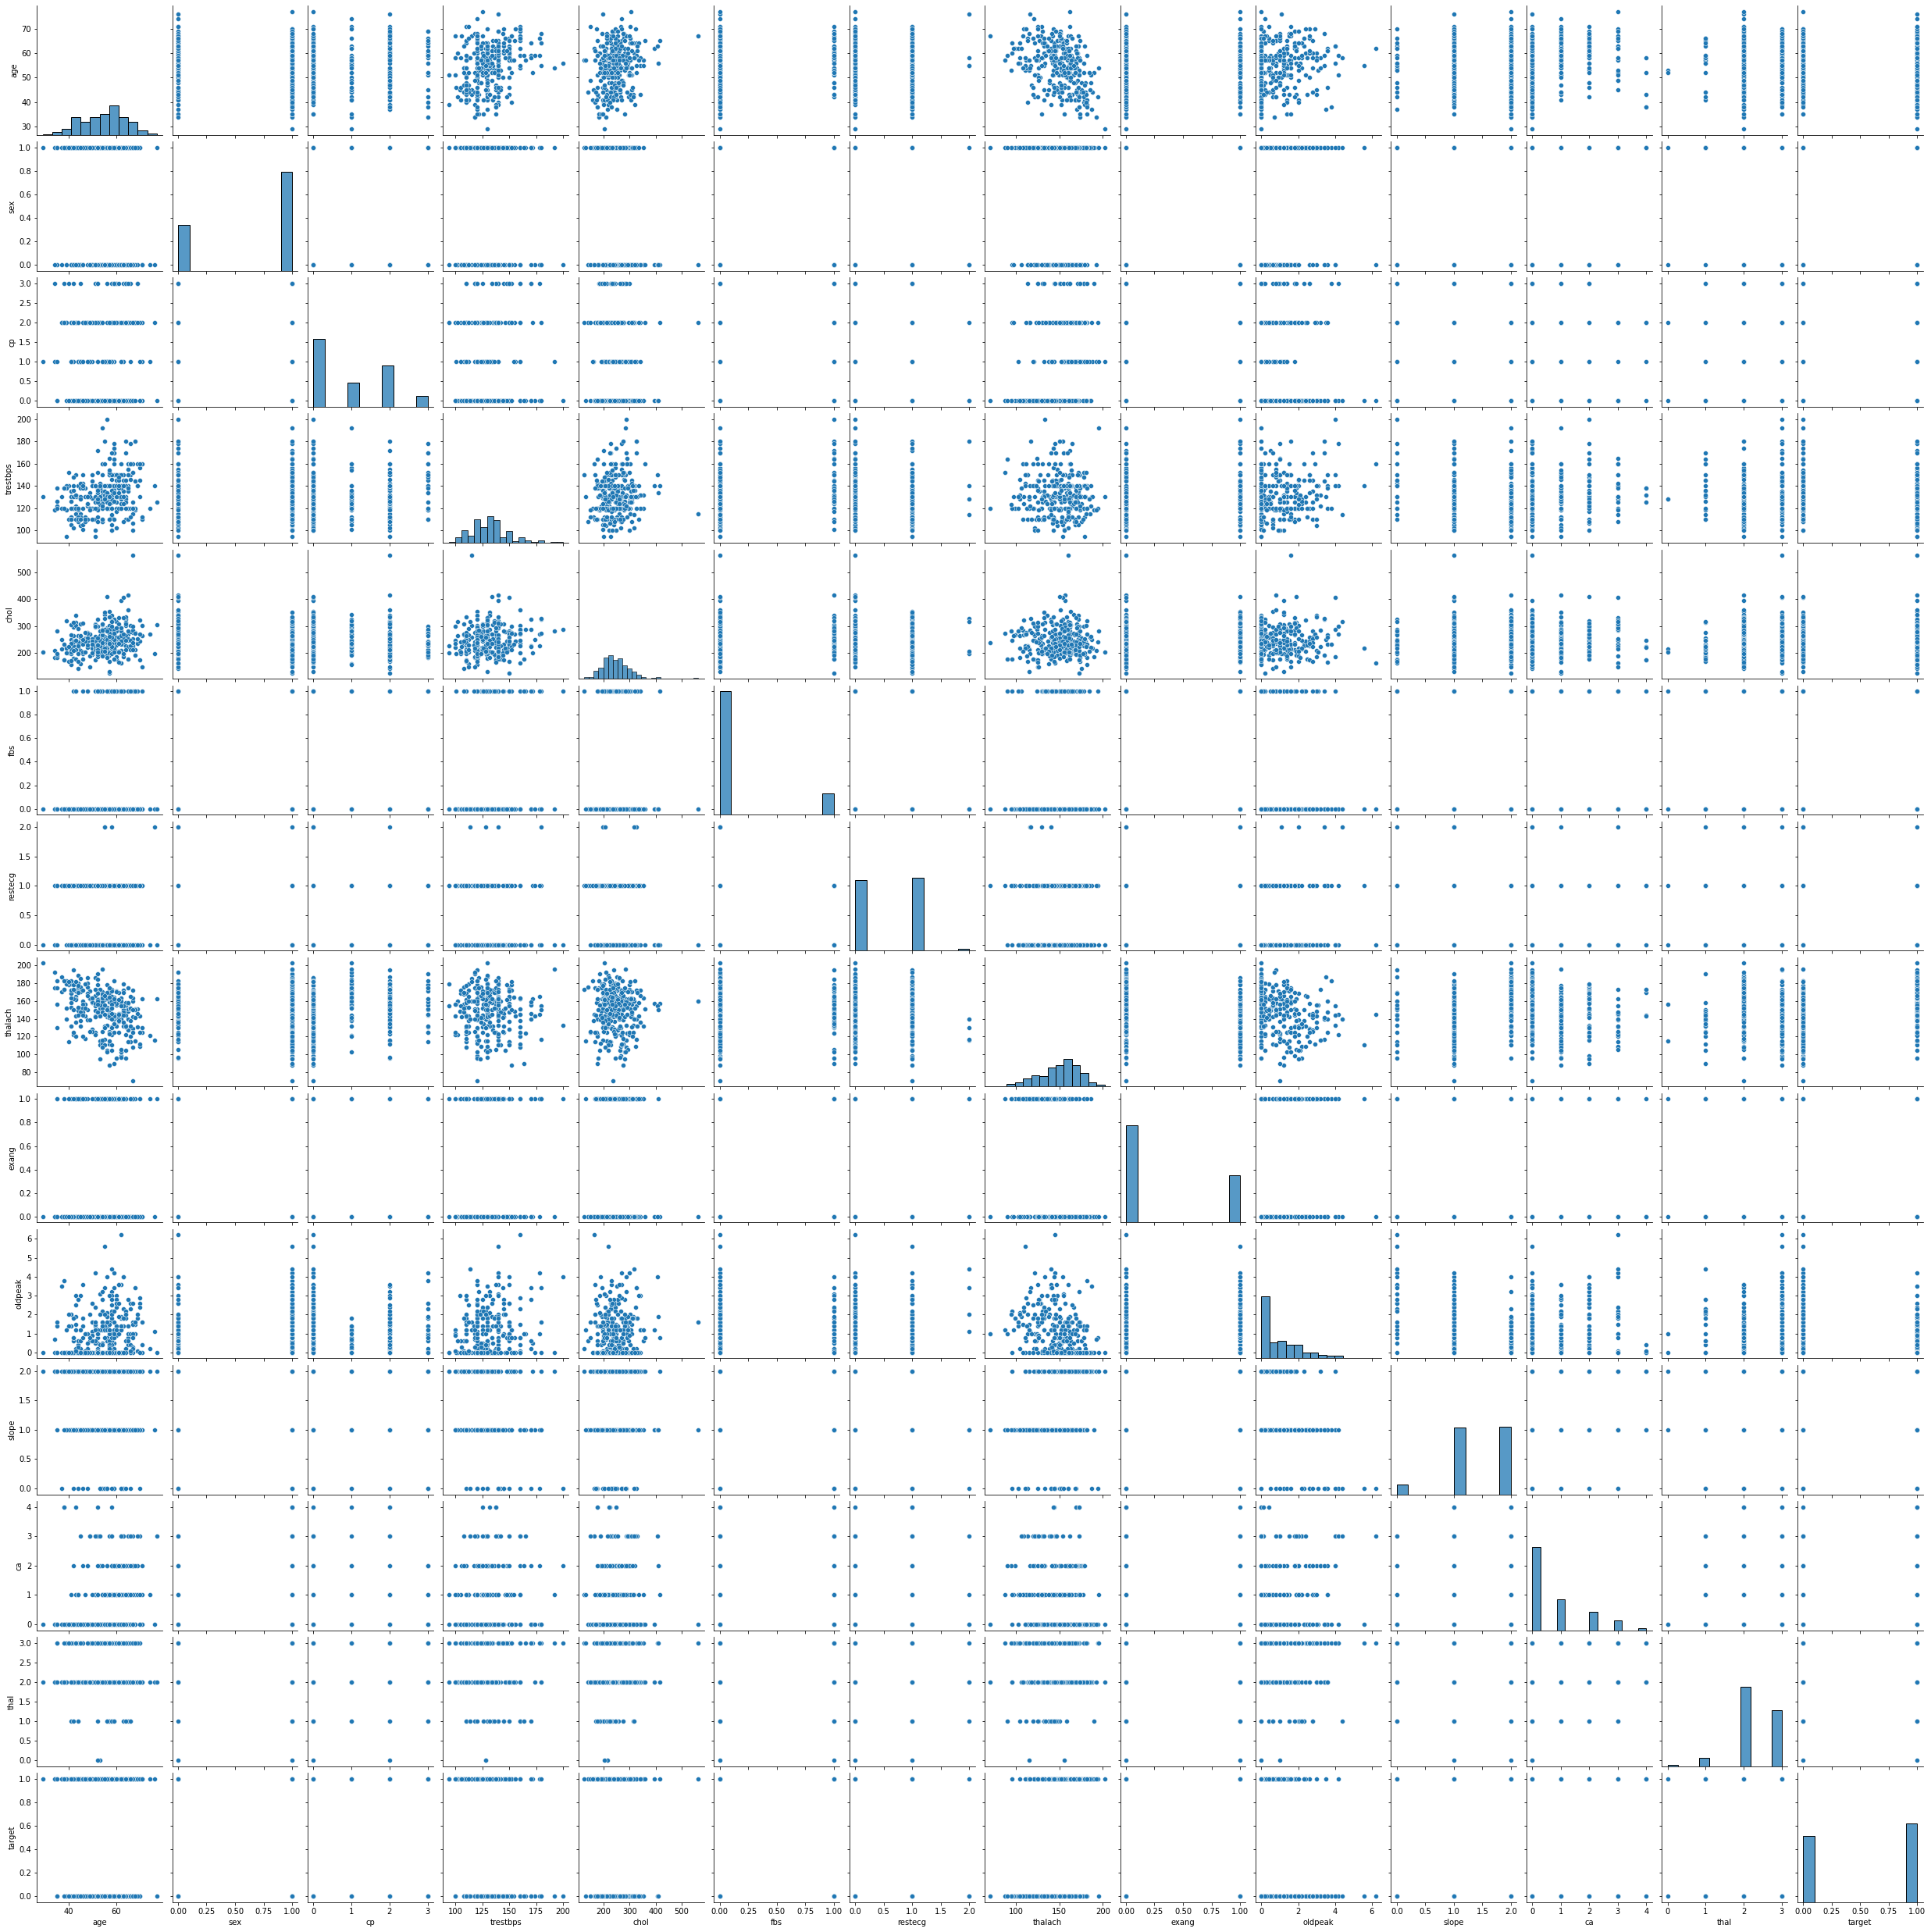

In [9]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f424d4730d0>,
      dtype=object)

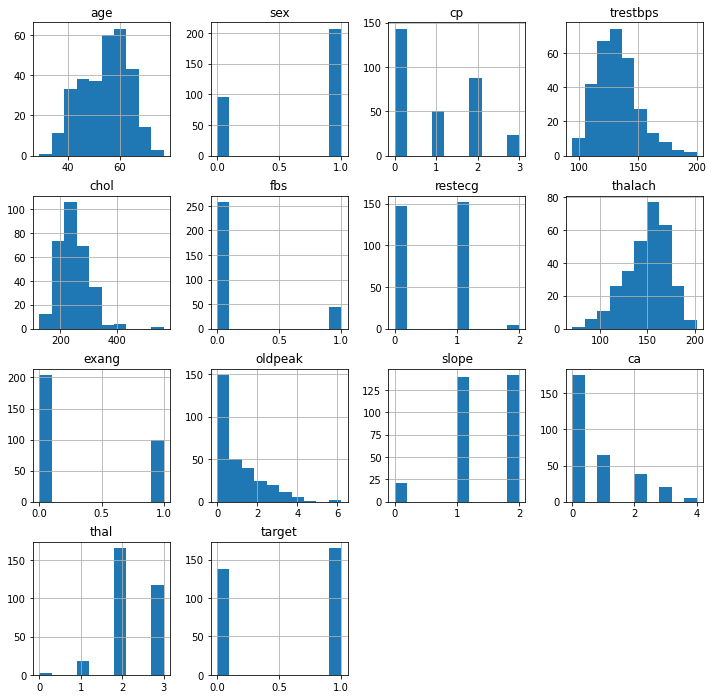

In [10]:
df.hist(figsize=(12, 12))

In [11]:
# a heat map to show the correlation between the features of the dataset
fig = px.imshow(df.corr())
fig.show()

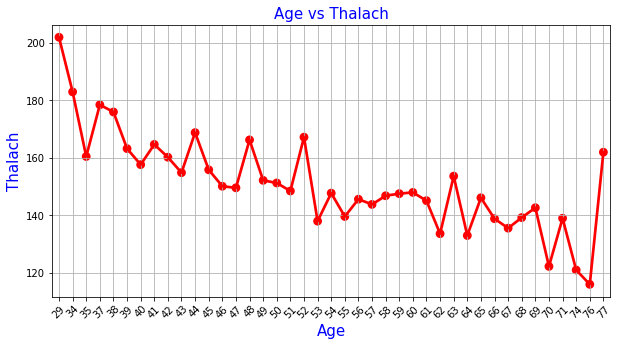

In [12]:
# thalac is the maximum heart rate achived
age_unique=sorted(df.age.unique())
age_thalach_values=df.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(df[df['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

### the machine learning part

In [27]:
X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

In [28]:
#X = (X - X.mean(axis=0))/X.std(axis=0) 

In [29]:
# splitting the data into training and testing test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [30]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

given that it is a classification problem we do not need to scale the target.
we have normalized the training data. and now we have it ready to feed it to a deep neural net 

## Neural Network

In [31]:
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [32]:
X_train.shape
X_test.shape

(61, 13)

In [11]:
'''
Y_train_binary = ytrain.copy()
Y_test_binary = ytest.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
'''

'\nY_train_binary = ytrain.copy()\nY_test_binary = ytest.copy()\nY_train_binary[Y_train_binary > 0] = 1\nY_test_binary[Y_test_binary > 0] = 1\n'

In [34]:
# the network
input1 = tf.keras.Input(shape=(13))
l = tf.keras.layers.Flatten()(input1)
l = tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                          activity_regularizer=regularizers.l2(1e-5))(l)
l = tf.keras.layers.BatchNormalization()(l)  
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2',
                          activity_regularizer=regularizers.l2(1e-5))(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.BatchNormalization()(l)
l = tf.keras.layers.Dense(12, activation='relu', kernel_regularizer='l2')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.BatchNormalization()(l)
out = tf.keras.layers.Dense(1, activation='sigmoid')(l)
final = Model(inputs=input1, outputs=out)

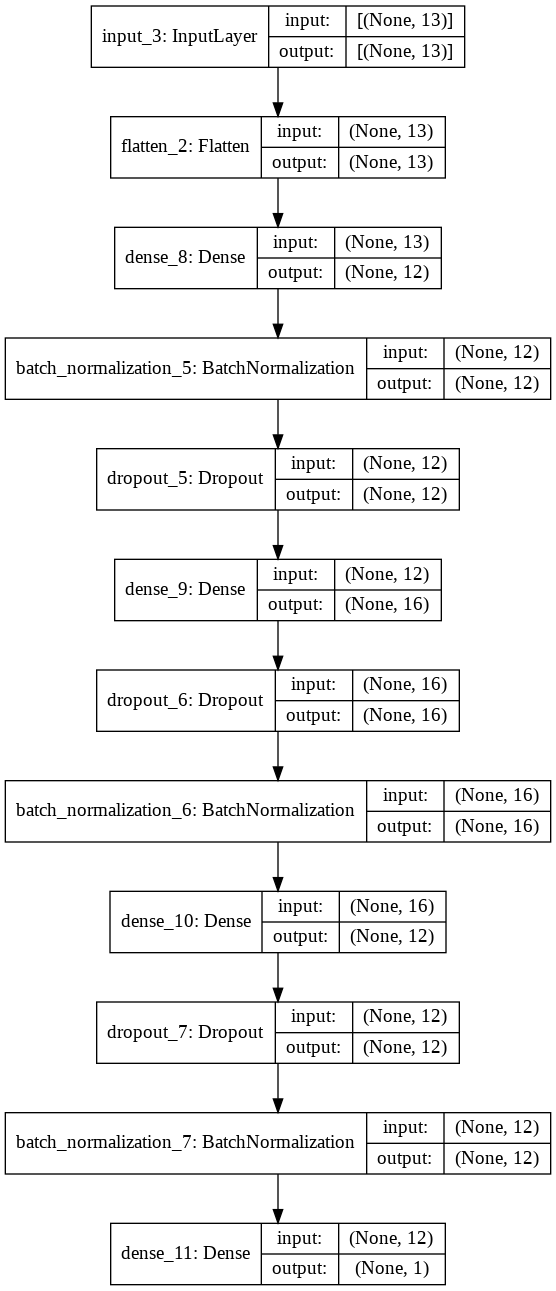

In [35]:
plot_model(final, show_shapes=True, show_layer_names=True)

In [36]:
final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 13)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                168       
_________________________________________________________________
batch_normalization_5 (Batch (None, 12)                48        
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0   

In [37]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr 
  else:
      return  lr * tf.math.exp(-0.1)

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
opt = keras.optimizers.Adam(learning_rate=0.001)
final.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
round(final.optimizer.lr.numpy(), 5)
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = final.fit(scl_train, y_train, validation_data=(scl_test, y_test), epochs=400, batch_size=32)

Epoch 1/400
8/8 [==============================] - 2s 71ms/step - loss: 1.4260 - accuracy: 0.3743 - val_loss: 1.0459 - val_accuracy: 0.5574
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 1.3621 - accuracy: 0.3705 - val_loss: 1.0136 - val_accuracy: 0.5410
Epoch 3/400
8/8 [==============================] - 0s 9ms/step - loss: 1.2544 - accuracy: 0.4117 - val_loss: 0.9882 - val_accuracy: 0.5246
Epoch 4/400
8/8 [==============================] - 0s 9ms/step - loss: 1.1620 - accuracy: 0.4765 - val_loss: 0.9676 - val_accuracy: 0.5410
Epoch 5/400
8/8 [==============================] - 0s 9ms/step - loss: 1.1578 - accuracy: 0.4951 - val_loss: 0.9491 - val_accuracy: 0.5082
Epoch 6/400
8/8 [==============================] - 0s 8ms/step - loss: 1.0953 - accuracy: 0.5022 - val_loss: 0.9321 - val_accuracy: 0.5902
Epoch 7/400
8/8 [==============================] - 0s 9ms/step - loss: 1.0700 - accuracy: 0.5214 - val_loss: 0.9181 - val_accuracy: 0.6393
Epoch 8/400
8/8 [=========

In [17]:
(final.optimizer.lr.numpy())

0.001

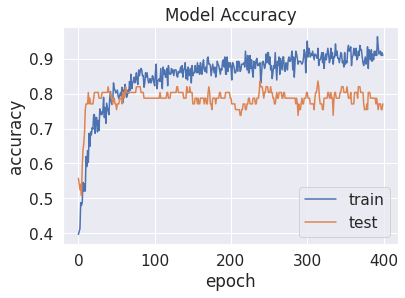

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

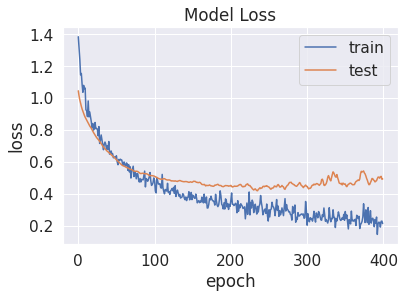

In [40]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [41]:
y_pred = final.predict(scl_test)

In [42]:
y_pred = (y_pred > 0.5)


## RESULTS AND METRICS

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[21  7]
 [ 7 26]]
Accuracy: 77.05%


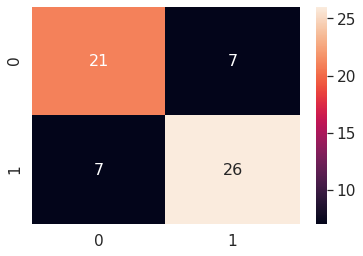

In [44]:
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## RandomForrest model

In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc

In [45]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
estimator = model.estimators_[1]
names = [i for i in df.drop(['target'], 1).columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

In [52]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = names, 
                class_names = ['no disease', 'disease'],
                label = 'root',
                precision = 2,
                filled = True)


In [53]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [54]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [55]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[19,  9],
       [ 1, 32]])

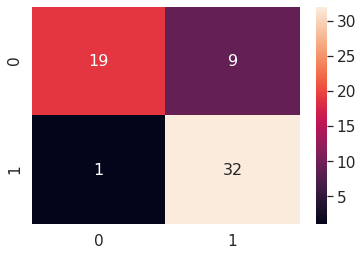

In [56]:
df_cm = pd.DataFrame(confusion_matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [57]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.95
Specificity :  0.7804878048780488
